In [1]:
## load packages
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

In [2]:
## load data
df = pd.read_csv('villagers.csv')
df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite_Song,Style_1,Style_2,Color_1,Color_2,Wallpaper,Flooring,Furniture_List,Filename,Unique_Entry_ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [3]:
## get unique count of each variable
df.nunique()

Name               391
Species             35
Gender               2
Personality          8
Hobby                6
Birthday           361
Catchphrase        388
Favorite_Song       89
Style_1              6
Style_2              6
Color_1             14
Color_2             14
Wallpaper          154
Flooring           128
Furniture_List     391
Filename           391
Unique_Entry_ID    391
dtype: int64

In [4]:
## keep the useful columns
keep = ['Name', 'Species', 'Gender', 'Personality', 'Hobby', 'Birthday', 'Style_1', 'Style_2', 'Color_1', 'Color_2']
df = df[keep]
df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Style_1,Style_2,Color_1,Color_2
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,Cool,Cool,Black,Blue
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,Active,Simple,Blue,Black
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,Simple,Elegant,Pink,White
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,Active,Active,Red,White
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,Simple,Simple,Red,Blue


In [5]:
## handle species
df['Species'].unique()
grouping_dict = {
    "ground_large" : ['Pig', 'Gorilla', 'Anteater', 'Bull',  'Horse', 'Kangaroo', 'Wolf','Elephant', 'Sheep', 'Deer', 'Tiger', 'Bear', 'Hippo', 'Lion', 'Rhino', 'Cow', 'Goat'],
    "ground_small" : ['Squirrel', 'Koala', 'Mouse', 'Cat',  'Hamster', 'Penguin',  'Chicken','Cub', 'Dog',  'Ostrich', 'Rabbit', 'Monkey'],
    "other": ['Alligator', 'Duck', 'Frog', 'Octopus', 'Bird', 'Eagle']
}
for key in grouping_dict.keys():
    lst = grouping_dict.get(key)
    df.loc[df.Species.isin(lst), "Species_group"] = key

In [6]:
df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Style_1,Style_2,Color_1,Color_2,Species_group
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,Cool,Cool,Black,Blue,other
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,Active,Simple,Blue,Black,ground_small
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,Simple,Elegant,Pink,White,ground_large
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,Active,Active,Red,White,ground_large
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,Simple,Simple,Red,Blue,other


In [7]:
## handle birthday
df['Birthday_month'] = df.Birthday.str[-3:]
df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Style_1,Style_2,Color_1,Color_2,Species_group,Birthday_month
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,Cool,Cool,Black,Blue,other,Jan
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,Active,Simple,Blue,Black,ground_small,Jul
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,Simple,Elegant,Pink,White,ground_large,Apr
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,Active,Active,Red,White,ground_large,Oct
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,Simple,Simple,Red,Blue,other,Jun


In [8]:
df.set_index('Name')

,Species,Gender,Personality,Hobby,Birthday,Style_1,Style_2,Color_1,Color_2,Species_group,Birthday_month
Name,,,,,,,,,,,
Admiral,Bird,Male,Cranky,Nature,27-Jan,Cool,Cool,Black,Blue,other,Jan
Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,Active,Simple,Blue,Black,ground_small,Jul
Agnes,Pig,Female,Big Sister,Play,21-Apr,Simple,Elegant,Pink,White,ground_large,Apr
Al,Gorilla,Male,Lazy,Fitness,18-Oct,Active,Active,Red,White,ground_large,Oct
Alfonso,Alligator,Male,Lazy,Play,9-Jun,Simple,Simple,Red,Blue,other,Jun
...,...,...,...,...,...,...,...,...,...,...,...
Winnie,Horse,Female,Peppy,Fashion,31-Jan,Cool,Simple,White,Gray,ground_large,Jan
Wolfgang,Wolf,Male,Cranky,Education,25-Nov,Cool,Active,Black,Green,ground_large,Nov
Yuka,Koala,Female,Snooty,Fashion,20-Jul,Cool,Elegant,Orange,Yellow,ground_small,Jul


In [9]:
df_all=df.copy()
df = df.drop(columns=["Birthday", "Species", "Name"])

In [10]:
df.head()

,Gender,Personality,Hobby,Style_1,Style_2,Color_1,Color_2,Species_group,Birthday_month
0,Male,Cranky,Nature,Cool,Cool,Black,Blue,other,Jan
1,Female,Peppy,Fitness,Active,Simple,Blue,Black,ground_small,Jul
2,Female,Big Sister,Play,Simple,Elegant,Pink,White,ground_large,Apr
3,Male,Lazy,Fitness,Active,Active,Red,White,ground_large,Oct
4,Male,Lazy,Play,Simple,Simple,Red,Blue,other,Jun


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 2659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 2659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100,

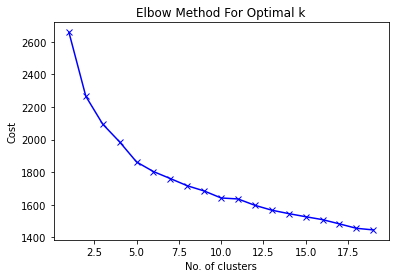

In [11]:
from sklearn.metrics import silhouette_score
## K Mode
# Elbow curve to find optimal K
cost = []
K = range(1,20)
for num_clusters in list(K):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 10, verbose=1, random_state=42)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
# Building the model with 6 clusters
kmode = KModes(n_clusters=10, init = "random", n_init = 12, verbose=1, random_state=42)
clusters = kmode.fit_predict(df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 118, cost: 1742.0
Run 1, iteration: 2/100, moves: 35, cost: 1709.0
Run 1, iteration: 3/100, moves: 11, cost: 1709.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 113, cost: 1649.0
Run 2, iteration: 2/100, moves: 33, cost: 1642.0
Run 2, iteration: 3/100, moves: 4, cost: 1642.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 86, cost: 1773.0
Run 3, iteration: 2/100, moves: 24, cost: 1754.0
Run 3, iteration: 3/100, moves: 14, cost: 1754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 106, cost: 1665.0
Run 4, iteration: 2/100, moves: 17, cost: 1665.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 82, cost: 1690.0
Run 5, ite

array([9, 6, 1, 6, 0, 1, 3, 3, 5, 0, 9, 3, 3, 4, 4, 6, 9, 0, 4, 1, 1, 1,
       7, 6, 3, 6, 1, 0, 1, 2, 0, 3, 4, 0, 0, 5, 1, 1, 6, 0, 7, 7, 0, 5,
       3, 4, 1, 0, 0, 0, 8, 6, 7, 9, 2, 4, 0, 3, 9, 3, 6, 6, 1, 9, 7, 1,
       7, 0, 0, 1, 1, 1, 3, 1, 9, 2, 6, 1, 3, 0, 5, 9, 2, 9, 1, 0, 3, 0,
       5, 0, 7, 6, 1, 0, 2, 1, 7, 0, 8, 0, 6, 7, 9, 9, 9, 1, 1, 0, 7, 3,
       0, 4, 3, 0, 8, 0, 6, 1, 1, 7, 0, 7, 2, 0, 3, 5, 0, 4, 9, 0, 2, 1,
       8, 1, 1, 0, 0, 3, 1, 1, 4, 8, 1, 4, 4, 9, 7, 5, 1, 5, 8, 1, 0, 3,
       1, 3, 1, 8, 7, 8, 3, 9, 9, 9, 3, 0, 9, 4, 9, 0, 9, 2, 0, 9, 0, 0,
       0, 6, 9, 0, 9, 1, 7, 0, 7, 0, 1, 3, 2, 1, 0, 3, 2, 8, 1, 6, 6, 2,
       5, 5, 4, 5, 8, 6, 2, 6, 2, 5, 8, 2, 9, 5, 2, 6, 2, 0, 1, 0, 6, 0,
       1, 5, 4, 1, 0, 5, 5, 1, 2, 4, 5, 1, 5, 1, 5, 1, 6, 4, 5, 0, 5, 3,
       8, 7, 6, 2, 8, 5, 1, 4, 0, 1, 5, 2, 9, 2, 0, 3, 4, 0, 4, 4, 0, 0,
       4, 1, 1, 5, 5, 1, 3, 7, 6, 1, 1, 1, 2, 2, 7, 2, 5, 4, 1, 0, 5, 0,
       1, 3, 0, 7, 1, 0, 0, 3, 3, 2, 0, 9, 2, 9, 4,

In [13]:
df_all.insert(0, "Cluster", clusters, True)
df_all

,Cluster,Name,Species,Gender,Personality,Hobby,Birthday,Style_1,Style_2,Color_1,Color_2,Species_group,Birthday_month
0,9,Admiral,Bird,Male,Cranky,Nature,27-Jan,Cool,Cool,Black,Blue,other,Jan
1,6,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,Active,Simple,Blue,Black,ground_small,Jul
2,1,Agnes,Pig,Female,Big Sister,Play,21-Apr,Simple,Elegant,Pink,White,ground_large,Apr
3,6,Al,Gorilla,Male,Lazy,Fitness,18-Oct,Active,Active,Red,White,ground_large,Oct
4,0,Alfonso,Alligator,Male,Lazy,Play,9-Jun,Simple,Simple,Red,Blue,other,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,4,Winnie,Horse,Female,Peppy,Fashion,31-Jan,Cool,Simple,White,Gray,ground_large,Jan
387,9,Wolfgang,Wolf,Male,Cranky,Education,25-Nov,Cool,Active,Black,Green,ground_large,Nov
388,3,Yuka,Koala,Female,Snooty,Fashion,20-Jul,Cool,Elegant,Orange,Yellow,ground_small,Jul
389,2,Zell,Deer,Male,Smug,Music,7-Jun,Cool,Gorgeous,Purple,Gray,ground_large,Jun


In [31]:
cluster_ct = pd.DataFrame(df_all.Cluster.value_counts())


In [32]:
cluster_ct

,Cluster
0,75
1,70
6,37
9,34
3,34
4,34
5,31
2,31
7,26
8,19


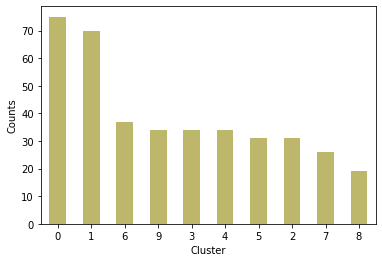

In [46]:

cluster_ct.plot.bar(rot = 0, xlabel = 'Cluster', ylabel='Counts', sort_columns= True, color = 'darkkhaki', legend = False)
plt.savefig('cluster_count', transparent=True)

In [16]:
df_all[df_all.Cluster == 0]

,Cluster,Name,Species,Gender,Personality,Hobby,Birthday,Style_1,Style_2,Color_1,Color_2,Species_group,Birthday_month
4,0,Alfonso,Alligator,Male,Lazy,Play,9-Jun,Simple,Simple,Red,Blue,other,Jun
9,0,Anchovy,Bird,Male,Lazy,Play,4-Mar,Simple,Simple,Colorful,Orange,other,Mar
17,0,Apple,Hamster,Female,Peppy,Play,24-Sep,Cute,Simple,Colorful,Red,ground_small,Sep
27,0,Barold,Cub,Male,Lazy,Play,2-Mar,Simple,Cool,Yellow,Black,ground_small,Mar
30,0,Beau,Deer,Male,Lazy,Nature,5-Apr,Simple,Cute,Beige,Orange,ground_large,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,Tangy,Cat,Female,Peppy,Music,17-Jun,Simple,Cute,Green,Yellow,ground_small,Jun
370,0,Ursala,Bear,Female,Big Sister,Music,16-Jan,Simple,Cute,Red,Orange,ground_large,Jan
378,0,Wade,Penguin,Male,Lazy,Nature,30-Oct,Simple,Gorgeous,Light blue,Blue,ground_small,Oct
379,0,Walker,Dog,Male,Lazy,Play,10-Jun,Simple,Simple,Orange,Red,ground_small,Jun


In [17]:
df_all.to_csv("temp_rec.csv")

In [18]:
joined = df.merge(df, how='outer', on='Cluster', suffixes = ['_villager', ''])

KeyError: 'Cluster'

In [ ]:
drop_list = ['Cluster', 'Species_villager', 'Gender_villager', 'Personality_villager', 'Hobby_villager', 'Birthday_villager', 'Style_1_villager', 'Style_2_villager', 'Color_1_villager', 'Color_2_villager']

In [ ]:
joined.drop(columns=drop_list, inplace=True)

In [ ]:
joined = joined[joined.Name_villager!=joined.Name]

In [ ]:
joined.shape[0]

7306

In [ ]:
index = np.arange(0,joined.shape[0])
index_str = [str(x) for x in index]

In [ ]:
joined['index'] = index_str

/var/folders/z6/13z_0xys7zd79ymtx93qrs340000gn/T/ipykernel_31876/2675901091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined['index'] = index_str


In [ ]:
joined

,Name_villager,Name,Species,Gender,Personality,Hobby,Birthday,Style_1,Style_2,Color_1,Color_2,index
0,Admiral,Apollo,other,Male,Cranky,Music,Jul,Cool,Simple,Black,Black,0
1,Admiral,Cyd,ground_large,Male,Cranky,Music,Jun,Cool,Active,Black,Yellow,1
2,Admiral,Gruff,ground_large,Male,Cranky,Music,Aug,Cool,Gorgeous,Purple,Black,2
3,Admiral,Hopper,ground_small,Male,Cranky,Music,Apr,Cool,Simple,Yellow,Red,3
4,Admiral,Rasher,ground_large,Male,Cranky,Music,Apr,Cool,Simple,Blue,Black,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7301,Shep,Jambette,other,Female,Normal,Fashion,Oct,Cool,Cool,Brown,Brown,7301
7302,Shep,Knox,ground_small,Male,Cranky,Education,Nov,Elegant,Gorgeous,Brown,Red,7302
7303,Shep,Limberg,ground_small,Male,Cranky,Education,Oct,Simple,Cool,Green,Blue,7303
7304,Shep,Murphy,ground_small,Male,Cranky,Education,Dec,Simple,Cool,Blue,White,7304


In [ ]:
joined['index'] = str(joined['index'])

/var/folders/z6/13z_0xys7zd79ymtx93qrs340000gn/T/ipykernel_31876/3696973658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined['index'] = str(joined['index'])


In [ ]:
joined

,Name_villager,Name,Species,Gender,Personality,Hobby,Birthday,Style_1,Style_2,Color_1,Color_2,index
0,Admiral,Apollo,other,Male,Cranky,Music,Jul,Cool,Simple,Black,Black,0 0\n1 1\n2 2\n3 ...
1,Admiral,Cyd,ground_large,Male,Cranky,Music,Jun,Cool,Active,Black,Yellow,0 0\n1 1\n2 2\n3 ...
2,Admiral,Gruff,ground_large,Male,Cranky,Music,Aug,Cool,Gorgeous,Purple,Black,0 0\n1 1\n2 2\n3 ...
3,Admiral,Hopper,ground_small,Male,Cranky,Music,Apr,Cool,Simple,Yellow,Red,0 0\n1 1\n2 2\n3 ...
4,Admiral,Rasher,ground_large,Male,Cranky,Music,Apr,Cool,Simple,Blue,Black,0 0\n1 1\n2 2\n3 ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7301,Shep,Jambette,other,Female,Normal,Fashion,Oct,Cool,Cool,Brown,Brown,0 0\n1 1\n2 2\n3 ...
7302,Shep,Knox,ground_small,Male,Cranky,Education,Nov,Elegant,Gorgeous,Brown,Red,0 0\n1 1\n2 2\n3 ...
7303,Shep,Limberg,ground_small,Male,Cranky,Education,Oct,Simple,Cool,Green,Blue,0 0\n1 1\n2 2\n3 ...
7304,Shep,Murphy,ground_small,Male,Cranky,Education,Dec,Simple,Cool,Blue,White,0 0\n1 1\n2 2\n3 ...


In [15]:
import pandas as pd
import numpy as np

def create_rec_table(df: pd.DataFrame,
                     clusters: np.array,
                     drop_list) -> pd.DataFrame:
    """Create the recommendation table. Needs to join two df's together.

    Args:
        df (pd.DataFrame): the original dataframe
        clusters (np.array): the clustering result
        drop_list (List): the items that are not needed in the end result

    Raises:
        ValueError: if the nrow of df doesn't match with the lenth of the cluter

    Returns:
        pd.DataFrame: the final rec result
    """

    # check if the nrow of the df is the same as the length of the clustering array
    df_nrows = df.shape[0]
    cluster_length = len(clusters)

    if df_nrows == cluster_length:      
        df.insert(0, "Cluster", clusters, True)
    else:
        raise ValueError("nrow of the df doesn't match length of the array.")

    # perform merging
    joined = df.merge(df, how="outer", on="Cluster", 
                    suffixes = ["_villager", ""])
    joined.drop(columns=drop_list, inplace=True)
    joined = joined[joined.Name_villager!=joined.Name]

    # set a unique index for further use in creating the SQL table
    index_str = [str(x) for x in np.arange(0,joined.shape[0])]
    joined["Unique_id"] = index_str

    return joined

df_in = pd.DataFrame(
{   "Name": ['a', 'b', 'c'],
    "col1": [2,4,6],
    "col2": [2,4,10],
    "col3": [2,7,6],
    "col4": [1,6,9]}
)

cluster_in = np.array([2,2,4])

drop_list_in = ['col1_villager', 'col2_villager', 'col3_villager', 'col4_villager', 'Cluster']
test = create_rec_table(df=df_in, clusters=cluster_in, drop_list=drop_list_in)

In [16]:
test

,Name_villager,Name,col1,col2,col3,col4,Unique_id
1,a,b,4,4,7,6,0
2,b,a,2,2,2,1,1


In [19]:
test.reset_index(inplace=True)

In [21]:
test.index

RangeIndex(start=0, stop=2, step=1)

In [24]:
df_true_values = [['19-Aug', 2, 2],
                ['20-May', 4, 4],
                ['21-May', 6, 10],
                ['09-Apr', 6, 10]]
df_true_col = ["Date", "col1", "col2"]
df_true = pd.DataFrame(df_true_values, columns=df_true_col).set_index('Date')

In [25]:
df_true

,col1,col2
Date,,
19-Aug,2,2
20-May,4,4
21-May,6,10
09-Apr,6,10


In [27]:
df_true.shape

(4, 2)

In [31]:
df_in_values = [['19-Aug', 2, 2],
                ['20-May', 4, 4],
                ['21-May', 6, 10],
                ['09-Apr', 6, 10]]
df_in_col = ["Date", "col1", "col2"]
df_in = pd.DataFrame(df_in_values, columns=df_in_col)

def resetting_index(df: pd.DataFrame, index_column: str) -> pd.DataFrame:
    """This function will reset the index of a dataframe

    Args:
        df (pd.DataFrame): the original dataframe
        index_column (str): the column to be set to index

    Raises:
        KeyError: if the index column is not in the dataframe

    Returns:
        pd.DataFrame: new df with index set.
    """

    all_cols = df.columns.values.tolist()
    if index_column not in all_cols:
        raise KeyError("index_column is not in the dataset. Check again!")
    df.set_index(index_column)
    return df

df_test = resetting_index(df_in, 'Date')

In [32]:
df_test

,Date,col1,col2
0,19-Aug,2,2
1,20-May,4,4
2,21-May,6,10
3,09-Apr,6,10
